/home/esteban/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


	Epoch 1 	Average Loss: 48.6681170463562
Model saved to models/fire//best_model.pth
Model saved to models/fire//last_model.pth


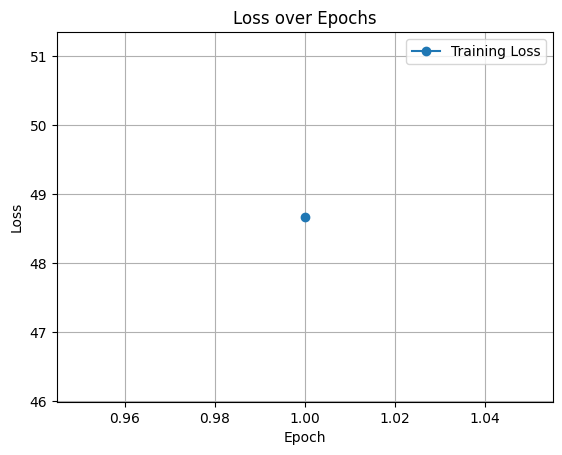

	Epoch 2 	Average Loss: 10.287889623641968
Model saved to models/fire//best_model.pth
Model saved to models/fire//last_model.pth


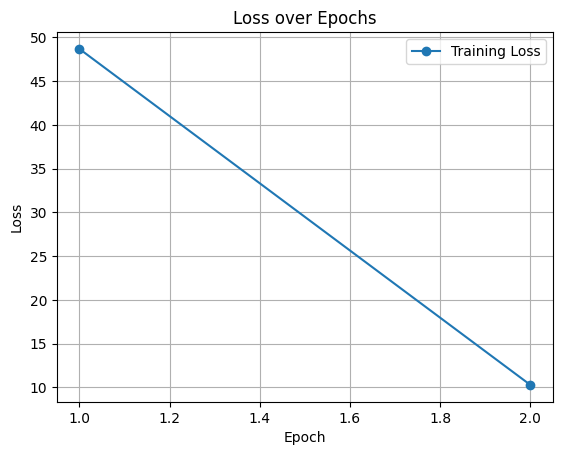

	Epoch 3 	Average Loss: 8.343563079833984
Model saved to models/fire//best_model.pth
Model saved to models/fire//last_model.pth


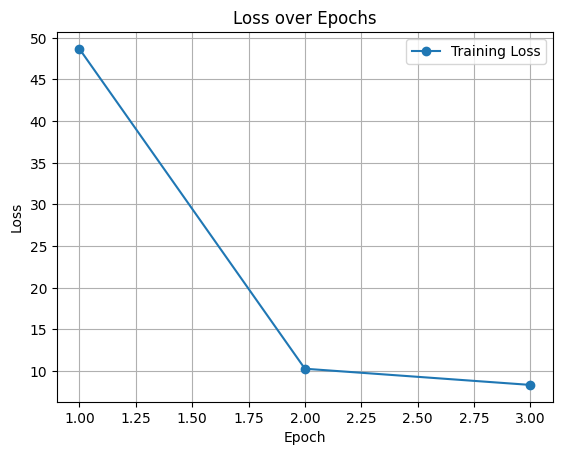

	Epoch 4 	Average Loss: 7.5060131549835205
Model saved to models/fire//best_model.pth
Model saved to models/fire//last_model.pth


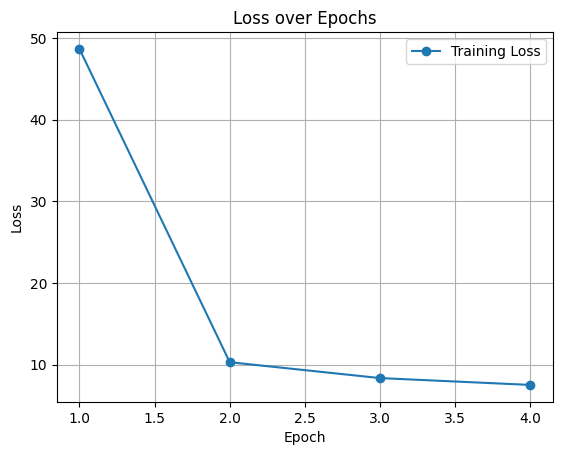

	Epoch 5 	Average Loss: 7.088668155670166
Model saved to models/fire//best_model.pth
Model saved to models/fire//last_model.pth


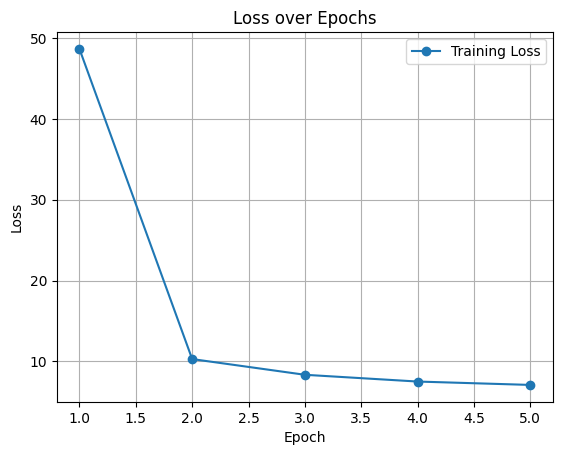

KeyboardInterrupt: 

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from modules.dataset import *
from modules.seeds import *
from modules.architecture import *
from modules.trainer import *

audio_path = 'sounds/fire_clean_augmented.wav'
model_path = 'models/fire/'

frame_size, N_filter_bank, param_per_env = 17640, 24, 512
hidden_size, deepness = 1024, 2
latent_dim = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sr = 44100
seed = seed_maker(frame_size, sr, N_filter_bank)
seed = seed.to(device)

#Dataset loading
dataset = VAE_Dataset(audio_path, frame_size, sr)
dataset_list = dataset.compute_dataset()
dataloader = DataLoader(dataset_list, batch_size=16, shuffle=True)

#Model loading
modelo = VAE_SubEnv(frame_size, hidden_size, deepness, latent_dim, N_filter_bank, param_per_env, seed, device)

#Optimizer
optimizer = optim.Adam(modelo.parameters(), lr=1e-3)

#Training
train(modelo, optimizer, 100, device, dataloader, model_path)

In [ ]:
# import torch
# import ipywidgets as widgets
# from IPython.display import display, Audio

# # Function to play sound from numpy array
# def play_sound(signal, sample_rate=44100):
#     display(Audio(signal, rate=sample_rate, autoplay=True))

# # Function to synthesize and play sound for given z
# def synthesize_and_play(z):
#     signal = model.generate(z)
#     signal = signal.detach().cpu().numpy()
#     play_sound(signal)

# for i in range(10):
#     #make random normal of size latent_dim
#     z = torch.randn(latent_dim)
#     print(z)
#     synthesize_and_play(z)

# # # Define the range and step size for the grid
# # z_range = torch.linspace(-1, 1, steps=5)  # Adjust the number of steps as needed

# # # Create a grid of buttons
# # grid_size = (len(z_range), len(z_range))
# # grid = widgets.GridspecLayout(grid_size[0], grid_size[1], height='400px')

# # # Assign buttons to the grid
# # for i, x in enumerate(z_range):
# #     for j, y in enumerate(z_range):
# #         z = torch.tensor([x, y])
# #         button = widgets.Button(description=f"({x.item():.1f},{y.item():.1f})")
# #         button.on_click(lambda b, z=z: synthesize_and_play(z))
# #         grid[i, j] = button

# # # Display the grid
# # display(grid)

tensor([-0.6038, -1.5044,  0.3028, -0.8835])


tensor([ 2.2330, -0.7613, -1.5830,  0.9886])


tensor([-1.7647,  1.1347,  0.7827,  0.3511])


tensor([-1.0512, -0.6694,  0.5047,  0.5188])


tensor([ 0.6121,  0.8622, -0.3418,  1.1045])


tensor([-0.3065,  0.9226,  0.4776, -0.0704])


tensor([-1.0132, -0.4182, -1.7710,  1.9356])


tensor([-2.2584,  0.0594,  1.9564,  0.2326])


tensor([-1.3082, -1.7759,  0.6473,  0.8896])


tensor([ 0.4960,  1.4542, -0.6431, -0.1223])


In [ ]:

# # Function to save the model
# def save_model(model, path):
#     torch.save(model.state_dict(), path)
#     print(f'Model saved to {path}')

# # Function to load the model
# def load_model(path, frame_size, hidden_size, deepness, latent_dim, N_filter_bank, param_per_env, seed):
#     model = VAE(frame_size, hidden_size, deepness, latent_dim, N_filter_bank, param_per_env, seed).to(device)
#     model.load_state_dict(torch.load(path, map_location=device))
#     print(f'Model loaded from {path}')
#     return model

In [ ]:
# # Save the model
# save_path = 'vae_model.pth'
# save_model(model, save_path)

# # Load the model
# loaded_model = load_model(save_path, frame_size, hidden_size, deepness, latent_dim, N_filter_bank, param_per_env, seed)


Model saved to vae_model.pth
Model loaded from vae_model.pth


In [ ]:
# # Function to synthesize and play sound for given z
# def synthesize_and_play_v(z):
#     signal = loaded_model.generate(z)
#     signal = signal.detach().cpu().numpy()
#     play_sound(signal)

# for i in range(10):
#     #make random normal of size latent_dim
#     z = torch.randn(latent_dim)
#     print(z)
#     synthesize_and_play(z)

tensor([-1.0559, -0.2534,  0.9240,  0.2586])


tensor([ 0.0267, -0.0404, -1.1980, -2.3274])


tensor([-2.5398,  0.6426,  0.8239,  1.6212])


tensor([-0.3612,  1.8919,  1.3524,  0.9014])


tensor([-0.7526,  0.2347,  0.4009,  1.5656])


tensor([-0.2458, -0.3814, -0.2405, -0.3336])


tensor([-0.2972,  0.3343, -0.3212,  2.0543])


tensor([ 0.9370,  0.6001, -0.3613, -0.5738])


tensor([ 1.3678, -0.0150, -0.7421, -0.9203])


tensor([-0.3534, -0.4103, -1.8786,  0.4276])
